# Importing Libraries

In [1]:
# data processing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
#reading dataset
train=pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration/Analysis

In [3]:
#to know shape of the dataset
train.shape

(891, 12)

891 rows and 12 columns are there in this data set

In [4]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Summary Statistics

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Observations

From here it is clear that 38% of peoples are survived and whose age between 42 and 80 those peoples are travelled in this ship...
and other one there is a missing data is present for example in Age column data missed alot here....

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

In [8]:
total=train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.

#                Data Visualization

## 1.Age and Sex 

In [10]:
train['Age'].isnull().sum()

177

from here you may see that in Age column there is no null data and null data is filled with mean ae of all the persons present in the ship

In [11]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [12]:
women=train[train['Sex']=='female']
men=train[train['Sex']=='male']

Text(0.5, 1.0, 'male')

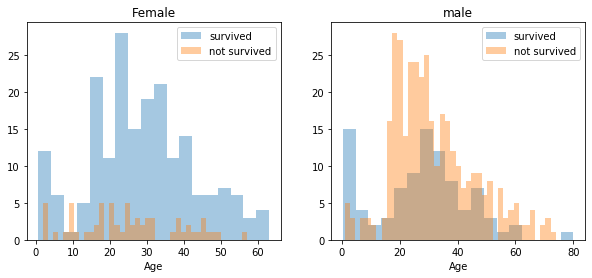

In [13]:
survived = 'survived'
not_survived = 'not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1],kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('male')

You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

For men the probability of survival is very low between the age of 5 and 18, but that isn’t true for women. Another thing to note is that infants also have a little bit higher probability of survival.

## 2.Embarked,Pclass and Sex

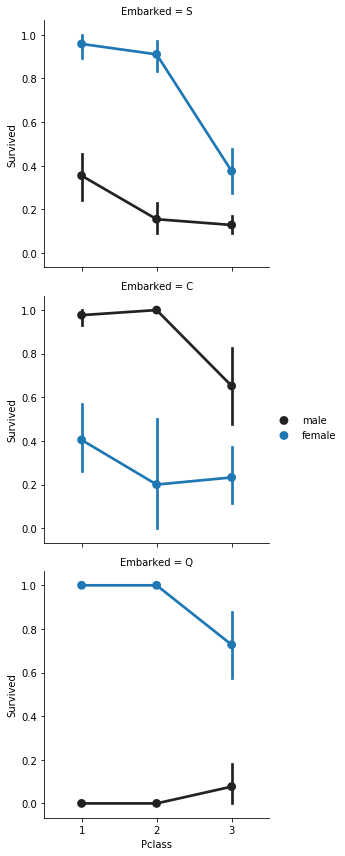

In [14]:
FacetGrid = sns.FacetGrid(train, row='Embarked', size=4, aspect=1)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. The inverse is true, if they are at port C. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

Pclass also seems to be correlated with survival. We will generate another plot of it below.

## 3.Pclass

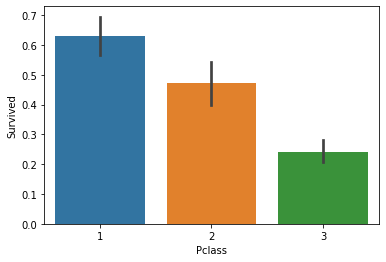

In [15]:
sns.barplot(x='Pclass', y='Survived', data=train)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

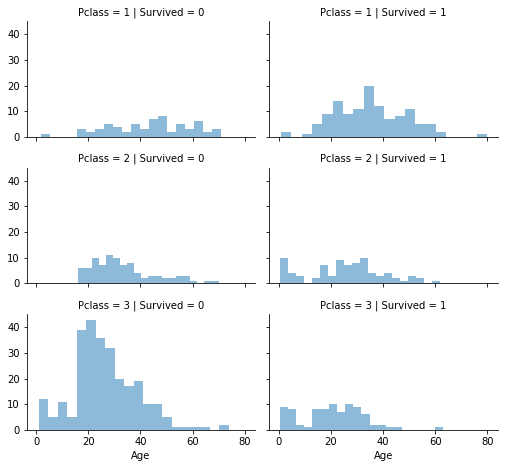

In [16]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [17]:
data = [train]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

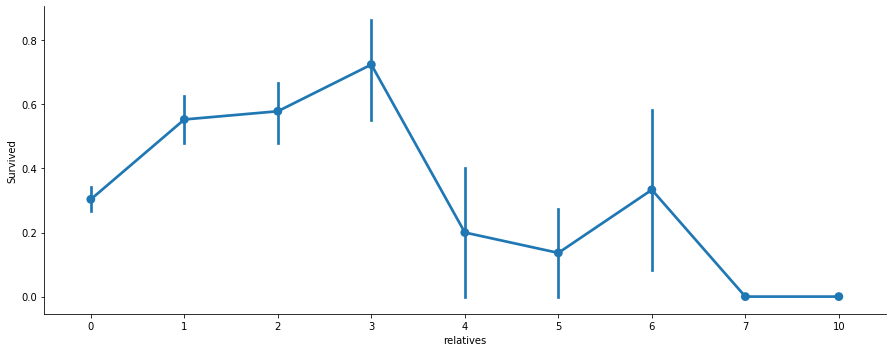

In [18]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )


Here we can see that you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Data Preprocessing

First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. 

In [19]:
train=train.iloc[:,1:]

In [20]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


# Missing Data

#### Cabin:

As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to G.

In [21]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [22]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
train['Cabin'] = train['Cabin'].fillna("U0")
train['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['Deck'] = train['Deck'].map(deck)
train['Deck'] = train['Deck'].fillna(0)
train['Deck'] = train['Deck'].astype(int)
# we can now drop the cabin feature
train = train.drop(['Cabin'], axis=1)

In [23]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


### Age:

Now we can tackle the issue with the age features missing values. I will create an array that contains random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null.


In [24]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [25]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,3


### Embarked:

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

from here we can observe most concentrated on S..

In [27]:
train['Embarked'].isnull().sum()

2

In [28]:
train['Embarked'].fillna('S',inplace=True)

In [29]:
train['Embarked'].isnull().sum()

0

Now it's clear that null data had been filled with some random data

In [30]:
train.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
relatives    0
not_alone    0
Deck         0
dtype: int64

## Converting Features

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

### Fare:

Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [32]:
train['Fare']=train['Fare'].fillna(0)
train['Fare']=train['Fare'].astype(int)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null int32
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


# Sex:

We will use the Sex feature so that we can build a new feature out of that.

In [34]:
genders={'male':0,'female':1}
train['Sex']=train['Sex'].map(genders)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null int32
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(6), object(3)
memory usage: 80.2+ KB


In [36]:
train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [37]:
train=train.drop(['Ticket'],axis=1)

## Embarked:

Convert ‘Embarked’ feature into numeric.

In [38]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
value={'S':0,'C':1,'Q':2}
train['Embarked']=train['Embarked'].map(value)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(7), object(1)
memory usage: 73.2+ KB


## Name:

We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [41]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
train['Title'] = train['Title'].map(titles)
# filling NaN with 0, to get safe
train['Title'] = train['Title'].fillna(0)
train = train.drop(['Name'], axis=1)

In [42]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22.000000,1,0,7,0,1,0,8,1
1,1,1,1,38.000000,1,0,71,1,1,0,3,3
2,1,3,1,26.000000,0,0,7,0,0,1,8,2
3,1,1,1,35.000000,1,0,53,0,1,0,3,3
4,0,3,0,35.000000,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13,0,0,1,8,5
887,1,1,1,19.000000,0,0,30,0,0,1,2,2
888,0,3,1,29.699118,1,2,23,0,3,0,8,2
889,1,1,0,26.000000,0,0,30,1,0,1,3,1


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null int32
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
Title        891 non-null int64
dtypes: float64(1), int32(3), int64(8)
memory usage: 73.2 KB


In [44]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22.000000,1,0,7,0,1,0,8,1
1,1,1,1,38.000000,1,0,71,1,1,0,3,3
2,1,3,1,26.000000,0,0,7,0,0,1,8,2
3,1,1,1,35.000000,1,0,53,0,1,0,3,3
4,0,3,0,35.000000,0,0,8,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13,0,0,1,8,5
887,1,1,1,19.000000,0,0,30,0,0,1,2,2
888,0,3,1,29.699118,1,2,23,0,3,0,8,2
889,1,1,0,26.000000,0,0,30,1,0,1,3,1


## Creating Categories

In [45]:
train['Age']=train['Age'].astype(int)

In [46]:
train['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [47]:
train.loc[train['Age']<=11,'Age']=0
train.loc[(train['Age']>11) & (train['Age']<=18),'Age']=1
train.loc[(train['Age']>18) & (train['Age']<=22),'Age']=2
train.loc[(train['Age']>22) & (train['Age']<=27),'Age']=3
train.loc[(train['Age']>27) & (train['Age']<=33),'Age']=4
train.loc[(train['Age']>33) & (train['Age']<=40),'Age']=5
train.loc[(train['Age']>40) & (train['Age']<=66),'Age']=6
train.loc[train['Age']>66,'Age']=7

In [48]:
# let's see how it's distributed
train['Age'].value_counts()

4    303
6    141
3    106
5    103
2     92
1     71
0     68
7      7
Name: Age, dtype: int64

## Fare

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [49]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [50]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 99), 'Fare']   = 3
train.loc[(train['Fare'] > 99) & (train['Fare'] <= 250), 'Fare']   = 4
train.loc[ dataset['Fare'] > 250, 'Fare'] = 5
train['Fare'] = train['Fare'].astype(int)

In [51]:
train['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [52]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,4,1,2,2,0,3,0,8,2
889,1,1,0,3,0,0,2,1,0,1,3,1


## Creating New Features

I will add two new features to the dataset, that I compute out of other features.

In [53]:
train['age_class']=train['Age']*train['Pclass']

In [54]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,age_class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6
887,1,1,1,2,0,0,2,0,0,1,2,2,2
888,0,3,1,4,1,2,2,0,3,0,8,2,12
889,1,1,0,3,0,0,2,1,0,1,3,1,3


## Fare per Persons

In [55]:
train['Fare_per_person']=train['Fare']/(train['relatives']+1)

In [56]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,age_class,Fare_per_person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0.0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1.5
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0.0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1.5
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,8,5,6,1.0
887,1,1,1,2,0,0,2,0,0,1,2,2,2,2.0
888,0,3,1,4,1,2,2,0,3,0,8,2,12,0.5
889,1,1,0,3,0,0,2,1,0,1,3,1,3,2.0


And now you can see difference between original data before cleansing and after cleansing 

# Building Machine Learning Models

In [57]:
x=train.iloc[:,1:]
y=train.iloc[:,0:1]

In [58]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=22,random_state=42)

In [59]:
train_x.shape

(869, 13)

In [60]:
test_x.shape

(22, 13)

In [61]:
train_y.shape

(869, 1)

In [62]:
test_y.shape

(22, 1)

## Logistic Regression

In [63]:
lg=LogisticRegression()
lg.fit(train_x, train_y)

pred_y = lg.predict(test_x)

acc_lg = round(lg.score(train_x, train_y) * 100, 2)
acc_lg

81.93

## Random Forest

In [64]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)

pred_y = random_forest.predict(test_x)

random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

92.17

## Stochastic Gradient Descent

In [65]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_x, train_y)
pred_y = sgd.predict(test_x)

sgd.score(train_x, train_y)

acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

69.16

## Gaussian Naive Bayes

In [66]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
accuracy_score(predgnb,test_y)
acc_gaussian = round(gnb.score(train_x, train_y) * 100, 2)
acc_gaussian

77.22

## Decission Tree:

In [67]:
decissiontree=DecisionTreeClassifier()
decissiontree.fit(train_x,train_y)
pred_y=decissiontree.predict(test_x)
print(accuracy_score(pred_y,test_y))
acc_decision_tree = round(decissiontree.score(train_x, train_y) * 100, 2)
print(acc_decision_tree)

0.8636363636363636
92.17


## Linear Support Vector System

In [68]:
linear_svc=LinearSVC()
linear_svc.fit(train_x,train_y)
pred_y = linear_svc.predict(test_x)
acc_linear_svc=round(linear_svc.score(train_x,train_y)*100,2)
acc_linear_svc

81.01

## Perceptron:

In [69]:
perceptron=Perceptron(max_iter=5)
perceptron.fit(train_x,train_y)
pred_y=perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)
acc_perceptron

75.26

## K Nearest Neighbor:

In [70]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x,train_y)
pred_y=knn.predict(test_x)
acc_knn=round(knn.score(train_x,train_y)*100,2)
acc_knn

85.62

# Which is the best model ?

In [71]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_lg, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.17,Random Forest
92.17,Decision Tree
85.62,KNN
81.93,Logistic Regression
81.01,Support Vector Machines
77.22,Naive Bayes
75.26,Perceptron
69.16,Stochastic Gradient Decent


As we can see, the Random Forest classifier goes on the first place.

# K-Fold Cross Validation

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get’s trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get’s trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

he result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [72]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, train_x, train_y, cv=19, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


Scores: [0.87234043 0.82978723 0.82978723 0.78723404 0.80851064 0.85106383
 0.7173913  0.76086957 0.91111111 0.84444444 0.84444444 0.8
 0.8        0.75555556 0.82222222 0.8        0.75555556 0.84444444
 0.93333333]
Mean: 0.819373441312192
Standard Deviation: 0.052097353949940424


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 5 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 5%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it’s performance even further in the following section.

## Feature Importance

In [73]:
importances = pd.DataFrame({'feature':train_x.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.210
Sex,0.164
age_class,0.095
Deck,0.083
Fare_per_person,0.078
Pclass,0.076
Age,0.070
Fare,0.060
relatives,0.051


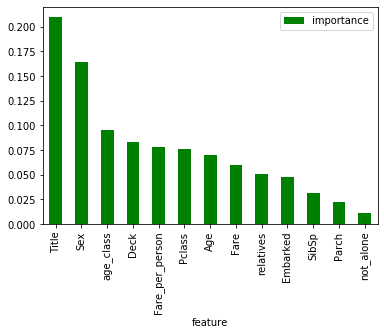

In [74]:
importances.plot.bar(color='green')

## Conclusion

not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.

In [75]:
train=train.drop('Parch',axis=1)
train=train.drop('not_alone',axis=1)

In [76]:
train

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,age_class,Fare_per_person
0,0,3,0,2,1,0,0,1,8,1,6,0.0
1,1,1,1,5,1,3,1,1,3,3,5,1.5
2,1,3,1,3,0,0,0,0,8,2,9,0.0
3,1,1,1,5,1,3,0,1,3,3,5,1.5
4,0,3,0,5,0,1,0,0,8,1,15,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,1,0,0,8,5,6,1.0
887,1,1,1,2,0,2,0,0,2,2,2,2.0
888,0,3,1,4,1,2,0,3,8,2,12,0.5
889,1,1,0,3,0,2,1,0,3,1,3,2.0


## Training Random Forest Again:

In [77]:
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True)
random_forest.fit(train_x, train_y)

pred_y = random_forest.predict(test_x)

random_forest.score(train_x, train_y)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.17 %


In [78]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(train_x, train_y)
prediction_y = random_forest.predict(test_x)

random_forest.score(train_x, train_y)

acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.17 %


Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [79]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.93 %


Now we can start tuning the hyperameters of random forest.

# Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [80]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(train_x,train_y)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

# Test New Parameters

In [81]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(train_x, train_y)
prediction_y = random_forest.predict(test_x)

random_forest.score(train_x, train_y)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 83.31 %


# Further Evaluation

In [83]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, train_x, train_y, cv=3)
confusion_matrix(train_y, predictions)

array([[479,  59],
       [ 85, 246]], dtype=int64)

## Precisiom and Recall

In [84]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(train_y, predictions))
print("Recall:",recall_score(train_y, predictions))

Precision: 0.8065573770491803
Recall: 0.743202416918429


Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 74 % of the people who actually survived.

## F Score

In [85]:
from sklearn.metrics import f1_score
f1_score(train_y, predictions)

0.7735849056603773

# Precision Recall Curve

In [88]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
scores_y = random_forest.predict_proba(train_x)
scores_y = scores_y[:,1]

precision, recall, threshold = precision_recall_curve(train_y, scores_y)

# ROC-AUC Curve

In [90]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y,scores_y)

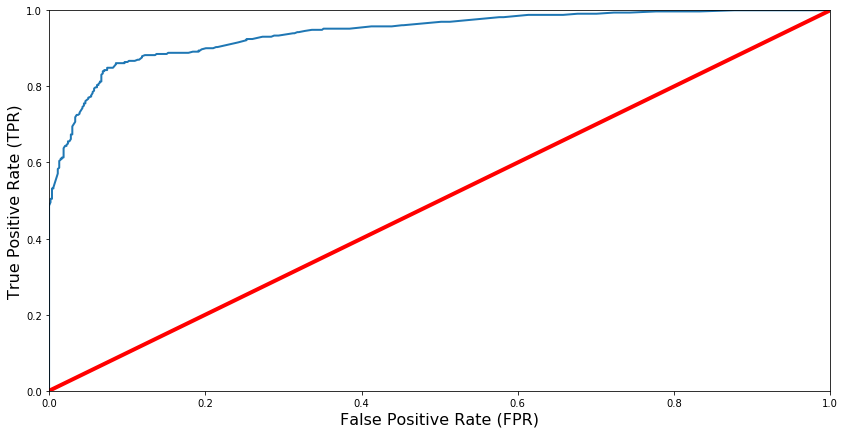

In [91]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [92]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(train_y, scores_y)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9412532710385336


score is good enough 

# Saving Model

In [93]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(random_forest,'random_forest.obj')
#load the model from a file
lg_from_joblib=joblib.load('random_forest.obj')
#use the loaded model to make prediction
lg_from_joblib.predict(test_x)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)